In [16]:
import pandas as pd

In [17]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

In [18]:
from sklearn.ensemble import RandomForestRegressor
from skforecast.recursive import ForecasterRecursive
from skforecast.preprocessing import RollingFeatures

In [19]:
dataset_path = '../../datasets/online_retail.xlsx'

In [20]:
df = pd.read_excel(dataset_path)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [21]:
from datetime import datetime

def format_date(date_str):
    date =  datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
    return date.date()

In [22]:
df['date'] = df['InvoiceDate'].apply(lambda x: format_date(str(x)))
df = df.groupby('date')['Price'].sum().reset_index()
df.head()

,date,Price
0,2009-12-01,14450.54
1,2009-12-02,13411.96
2,2009-12-03,13290.25
3,2009-12-04,9687.28
4,2009-12-05,1443.26


In [23]:
# df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.set_index('date')
df = df.asfreq('D', fill_value=0.0)
df = df.sort_index()

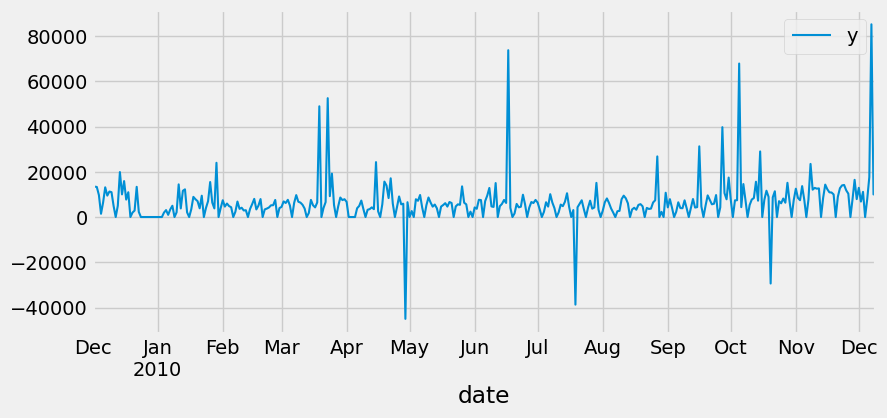

In [24]:
fig, ax = plt.subplots(figsize=(9, 4))
df['Price'].plot(ax=ax, label='y')
# df['exog_1'].plot(ax=ax, label='exogenous variable')
ax.legend()

Train dates : 2009-12-01 00:00:00 --- 2010-10-20 00:00:00  (n=324)
Test dates  : 2010-10-21 00:00:00 --- 2010-12-09 00:00:00  (n=50)


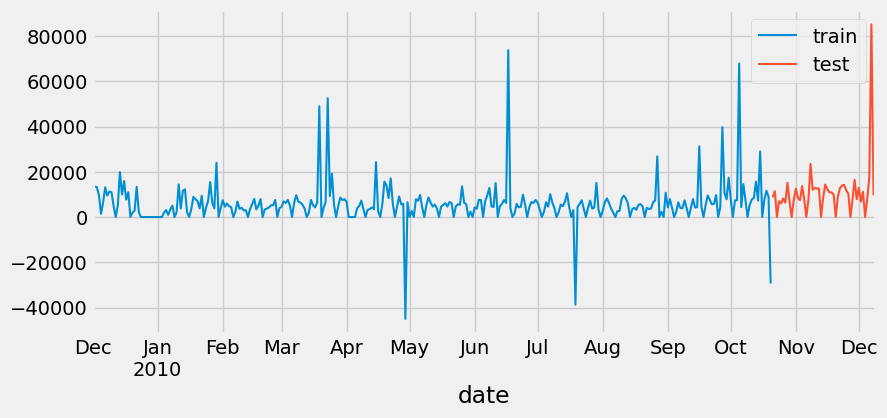

In [51]:
steps = 50
data_train = df[:-steps]
data_test  = df[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
data_train['Price'].plot(ax=ax, label='train')
data_test['Price'].plot(ax=ax, label='test')
ax.legend()

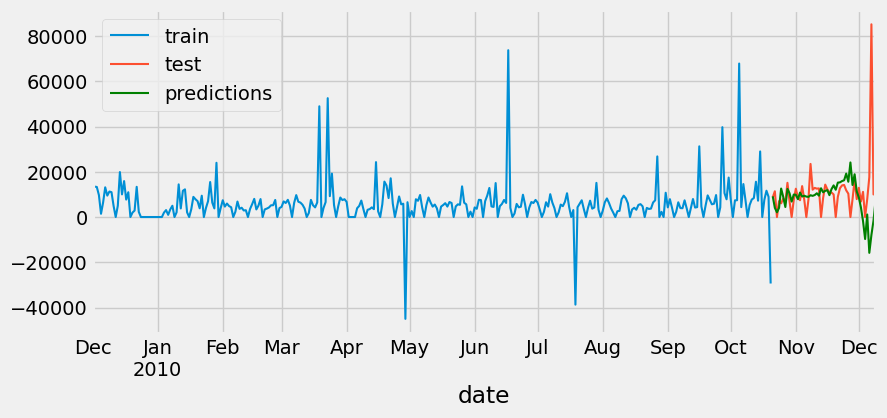

In [52]:
forecaster = ForecasterRecursive(
                regressor = RandomForestRegressor(max_depth=10, n_estimators=50, random_state=123),
                lags      = 12,
                window_features = RollingFeatures(stats=['mean'], window_sizes=10)
             )

forecaster.fit(y=data_train['Price'])
# forecaster

predictions = forecaster.predict(steps=steps)
# predictions.head(5)

fig, ax=plt.subplots(figsize=(9, 4))
data_train['Price'].plot(ax=ax, label='train')
data_test['Price'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions', color='green')
ax.legend()

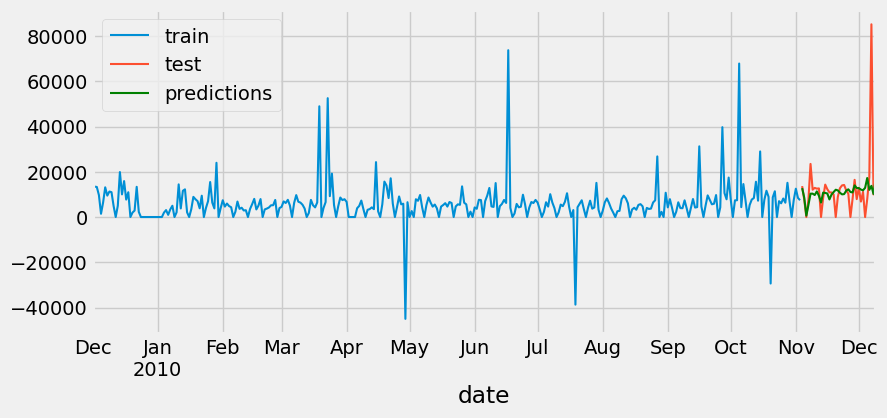

In [ ]:
regressor = RandomForestRegressor(
    n_estimators=1000,                # Número de árvores na floresta
    criterion='squared_error',       # Função de avaliação (erro quadrático)
    max_depth=10,                   # Profundidade máxima das árvores
    min_samples_split=2,             # Mínimo de amostras necessárias para dividir um nó
    min_samples_leaf=1,              # Mínimo de amostras para estar em uma folha
    max_features='auto',             # Número de características a serem consideradas para dividir
    max_samples=None,                # Número de amostras usadas para treinar as árvores
    bootstrap=True,                  # Se as árvores são treinadas com amostras com reposição
    oob_score=False,                 # Não calcular a pontuação fora da bolsa
    n_jobs=None,                     # Número de CPUs para usar (-1 significa usar todos os núcleos)
    random_state=1,                  # Controle de aleatoriedade
    verbose=0,                       # Nível de verbosidade (informações sobre o treinamento)
    warm_start=False,                # Se True, reutiliza a solução anterior e adiciona mais árvores
    class_weight=None,               # Peso das classes (não usado em regressão)
    ccp_alpha=0.0,                   # Parâmetro de poda para controle de complexidade
    min_impurity_decrease=0.0,       # Impureza mínima necessária para dividir um nó
    min_impurity_split=None,         # (Obsoleto) Define a impureza mínima para dividir
    max_samples=None                 # Número máximo de amostras para treinar cada árvore
)

window_features = RollingFeatures(
    stats=['mean'],                  # Estatísticas a serem calculadas (média, desvio padrão, etc.)
    window_sizes=10,                 # Tamanho da janela deslizante para as estatísticas
    min_periods=None,                # Mínimo de períodos necessários para calcular a estatística
    center=False,                    # Se True, a janela é centralizada sobre o ponto
    axis=0,                          # O eixo ao longo do qual calcular as estatísticas
    min_periods=None                 # Mínimo de períodos necessários para calcular o valor da estatística
)

forecaster = ForecasterRecursive(
    regressor       = regressor,
    lags            = 12,
    window_features = window_features
)

forecaster.fit(y=data_train['Price'])
# forecaster

predictions = forecaster.predict(steps=steps)
# predictions.head(5)

fig, ax=plt.subplots(figsize=(9, 4))
data_train['Price'].plot(ax=ax, label='train')
data_test['Price'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions', color='green')
ax.legend()

# Parâmetros do RandomForestRegressor e RollingFeatures

## 1. RandomForestRegressor
O `RandomForestRegressor` é um modelo de aprendizado de máquina baseado em árvores de decisão, e os parâmetros a seguir controlam o comportamento da floresta aleatória.

### Parâmetros:

- **`n_estimators`**: (int, default=100)
  - Número de árvores na floresta. Um valor maior tende a melhorar a precisão, mas aumenta o custo computacional.
  
- **`criterion`**: {'squared_error', 'absolute_error', 'poisson'}, default='squared_error'
  - Função de avaliação usada para dividir os nós. As opções mais comuns são:
    - `'squared_error'`: Erro quadrático médio (MSE).
    - `'absolute_error'`: Erro absoluto médio (MAE).
    - `'poisson'`: Usado em modelos de contagem.
  
- **`max_depth`**: (int, default=None)
  - Profundidade máxima das árvores. Se `None`, as árvores crescerão até o limite do número de amostras ou das outras condições de parada.

- **`min_samples_split`**: (int ou float, default=2)
  - Número mínimo de amostras necessárias para dividir um nó interno. Se um número inteiro, é o valor absoluto de amostras; se float, representa uma fração das amostras.

- **`min_samples_leaf`**: (int ou float, default=1)
  - Número mínimo de amostras necessárias para estar em uma folha. Aumentar esse valor pode evitar overfitting.

- **`max_features`**: (int, float, string ou None, default='auto')
  - Número de características a serem consideradas para procurar a melhor divisão. Pode ser um número inteiro, um valor float representando uma fração das características, ou uma string ('sqrt', 'log2', etc.).

- **`max_samples`**: (int ou float, default=None)
  - Número de amostras a serem usadas para treinar cada árvore. Se for um valor inteiro, indica o número exato de amostras, se for um valor float, indica a fração das amostras.

- **`bootstrap`**: (bool, default=True)
  - Se `True`, amostras com reposição (bootstrap) são usadas para treinar as árvores. Caso contrário, as amostras são usadas sem reposição.

- **`oob_score`**: (bool, default=False)
  - Se `True`, calcula a pontuação de amostras fora da bolsa (out-of-bag) para avaliar o desempenho do modelo.

- **`n_jobs`**: (int, default=None)
  - Número de CPUs a serem usadas para o treinamento. Se `-1`, utiliza todos os núcleos disponíveis.

- **`random_state`**: (int, RandomState instance ou None, default=None)
  - Controla a aleatoriedade de várias funções (como o embaralhamento de amostras ou a inicialização das árvores).

- **`verbose`**: (int, default=0)
  - Controla o nível de verbosidade. Um valor maior imprime mais informações durante o treinamento.

- **`warm_start`**: (bool, default=False)
  - Se `True`, reutiliza as soluções anteriores e adiciona mais árvores ao modelo.

- **`class_weight`**: (dict, 'balanced', 'balanced_subsample' ou None, default=None)
  - Define pesos para as classes (não utilizado em regressão).

- **`ccp_alpha`**: (float, default=0.0)
  - Parâmetro de poda para controle da complexidade do modelo. Um valor maior pode evitar overfitting.

- **`min_impurity_decrease`**: (float, default=0.0)
  - A quantidade mínima de diminuição na impureza necessária para dividir um nó.

- **`min_impurity_split`**: (float, default=None)
  - (Obsoleto) A impureza mínima necessária para dividir um nó.

---

## 2. RollingFeatures
O `RollingFeatures` é usado para calcular estatísticas de uma série temporal usando uma janela deslizante. Abaixo estão os parâmetros disponíveis para configurar a janela.

### Parâmetros:

- **`stats`**: (list of str, default=None)
  - Uma lista de estatísticas a serem calculadas na janela deslizante. Exemplos incluem:
    - `'mean'`: Média
    - `'std'`: Desvio padrão
    - `'min'`: Valor mínimo
    - `'max'`: Valor máximo
    - `'sum'`: Soma
    - `'median'`: Mediana
    - `'skew'`: Assimetria
    - `'kurt'`: Curtose
  
- **`window_sizes`**: (int, list of int, default=5)
  - Tamanho da janela deslizante. Pode ser um número inteiro (tamanho fixo) ou uma lista com diferentes tamanhos para cada estatística.

- **`min_periods`**: (int, default=None)
  - Número mínimo de observações necessárias para calcular a estatística. Se `None`, será igual ao tamanho da janela.

- **`center`**: (bool, default=False)
  - Se `True`, a janela é centralizada em torno do ponto. Se `False`, a janela será "para frente", ou seja, a janela começa antes do ponto.

- **`axis`**: (int, default=0)
  - O eixo ao longo do qual as estatísticas serão calculadas. Para séries temporais univariadas, o valor será 0.

- **`min_periods`**: (int, default=None)
  - Número mínimo de períodos necessários para calcular o valor da estatística. Se não houver amostras suficientes, o valor retornado será NaN.


In [ ]:
# import joblib

In [ ]:
# joblib.dump(model, 'house_price_linear_regression_model.pkl')